<a href="https://colab.research.google.com/github/Jackline-Jebet/ML-Data-Science-Financial-Data/blob/main/Financial_data_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fredapi

In [3]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Initialize Fred API
frd = Fred(api_key='6a6eafb6fa1a89c296d07dc4fad6011d')

# List of treasury yield Series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_series_data(series_id):
    data = frd.get_series(series_id, observation_start="1996-01-01", observation_end="2023-10-25" )
    return data

#Get data all series
yield_data = {series_id: get_series_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
df = pd.DataFrame(yield_data)

# Rename the columns for clarity
df.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', \
              '5 Year', '7 Year', '10 Year', '20 Year', '30 Year']

In [5]:
df.index = pd.to_datetime(df.index)
df.loc['2021-02-04']

1 Month    0.03
3 Month    0.04
6 Month    0.06
1 Year     0.07
2 Year     0.11
3 Year     0.18
5 Year     0.46
7 Year     0.81
10 Year    1.15
20 Year    1.75
30 Year    1.93
Name: 2021-02-04 00:00:00, dtype: float64

In [6]:
df.isna().sum(axis = 0)

1 Month    1696
3 Month     297
6 Month     297
1 Year      297
2 Year      297
3 Year      297
5 Year      297
7 Year      297
10 Year     297
20 Year     297
30 Year     297
dtype: int64

In [7]:
# We can see that during the days that the 10-year is not reported,
# none maturity is reported as well.
df[df['10 Year'].isna() == True].sum(axis = 0)

1 Month    0.0
3 Month    0.0
6 Month    0.0
1 Year     0.0
2 Year     0.0
3 Year     0.0
5 Year     0.0
7 Year     0.0
10 Year    0.0
20 Year    0.0
30 Year    0.0
dtype: float64

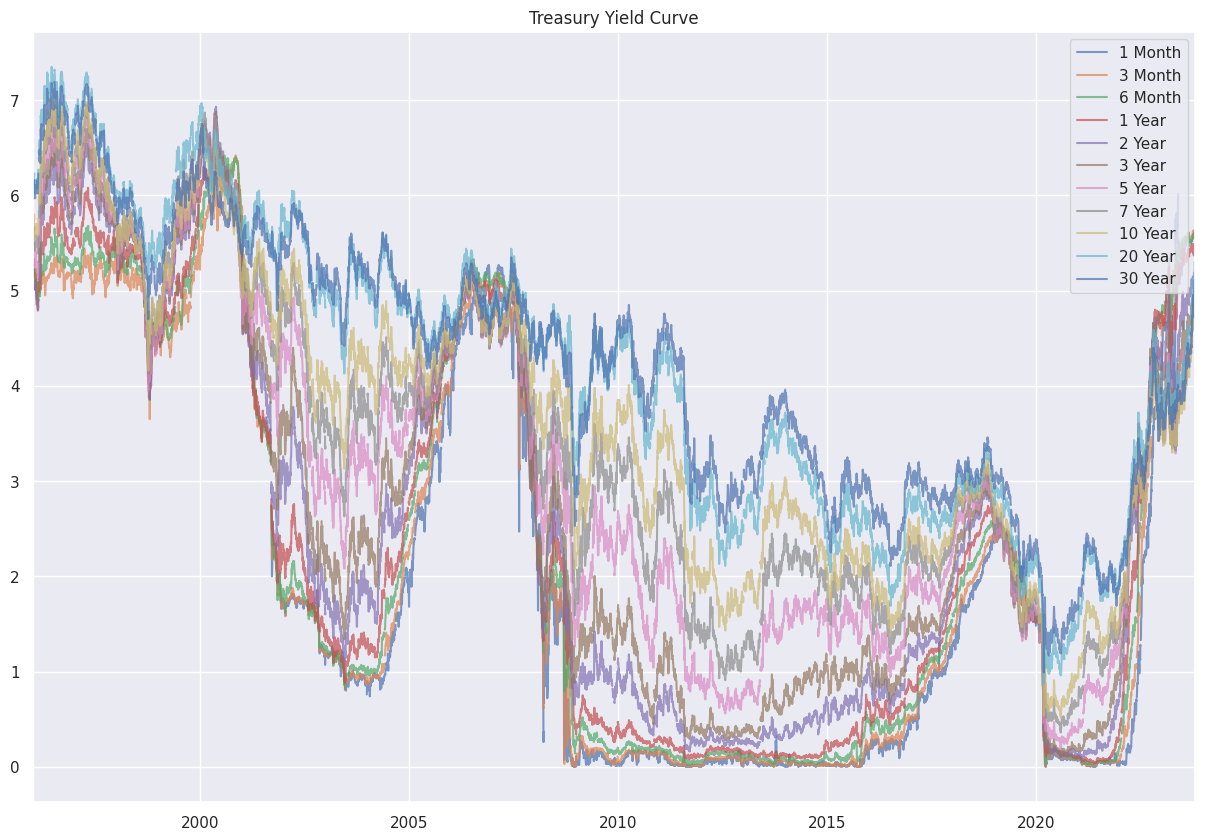

In [10]:
#  Fiogure 1
df.plot(figsize=(15, 10), title='Treasury Yield Curve', alpha=0.7) # Plot the Yields
plt.legend(loc='upper right') # Add a legend
plt.show()

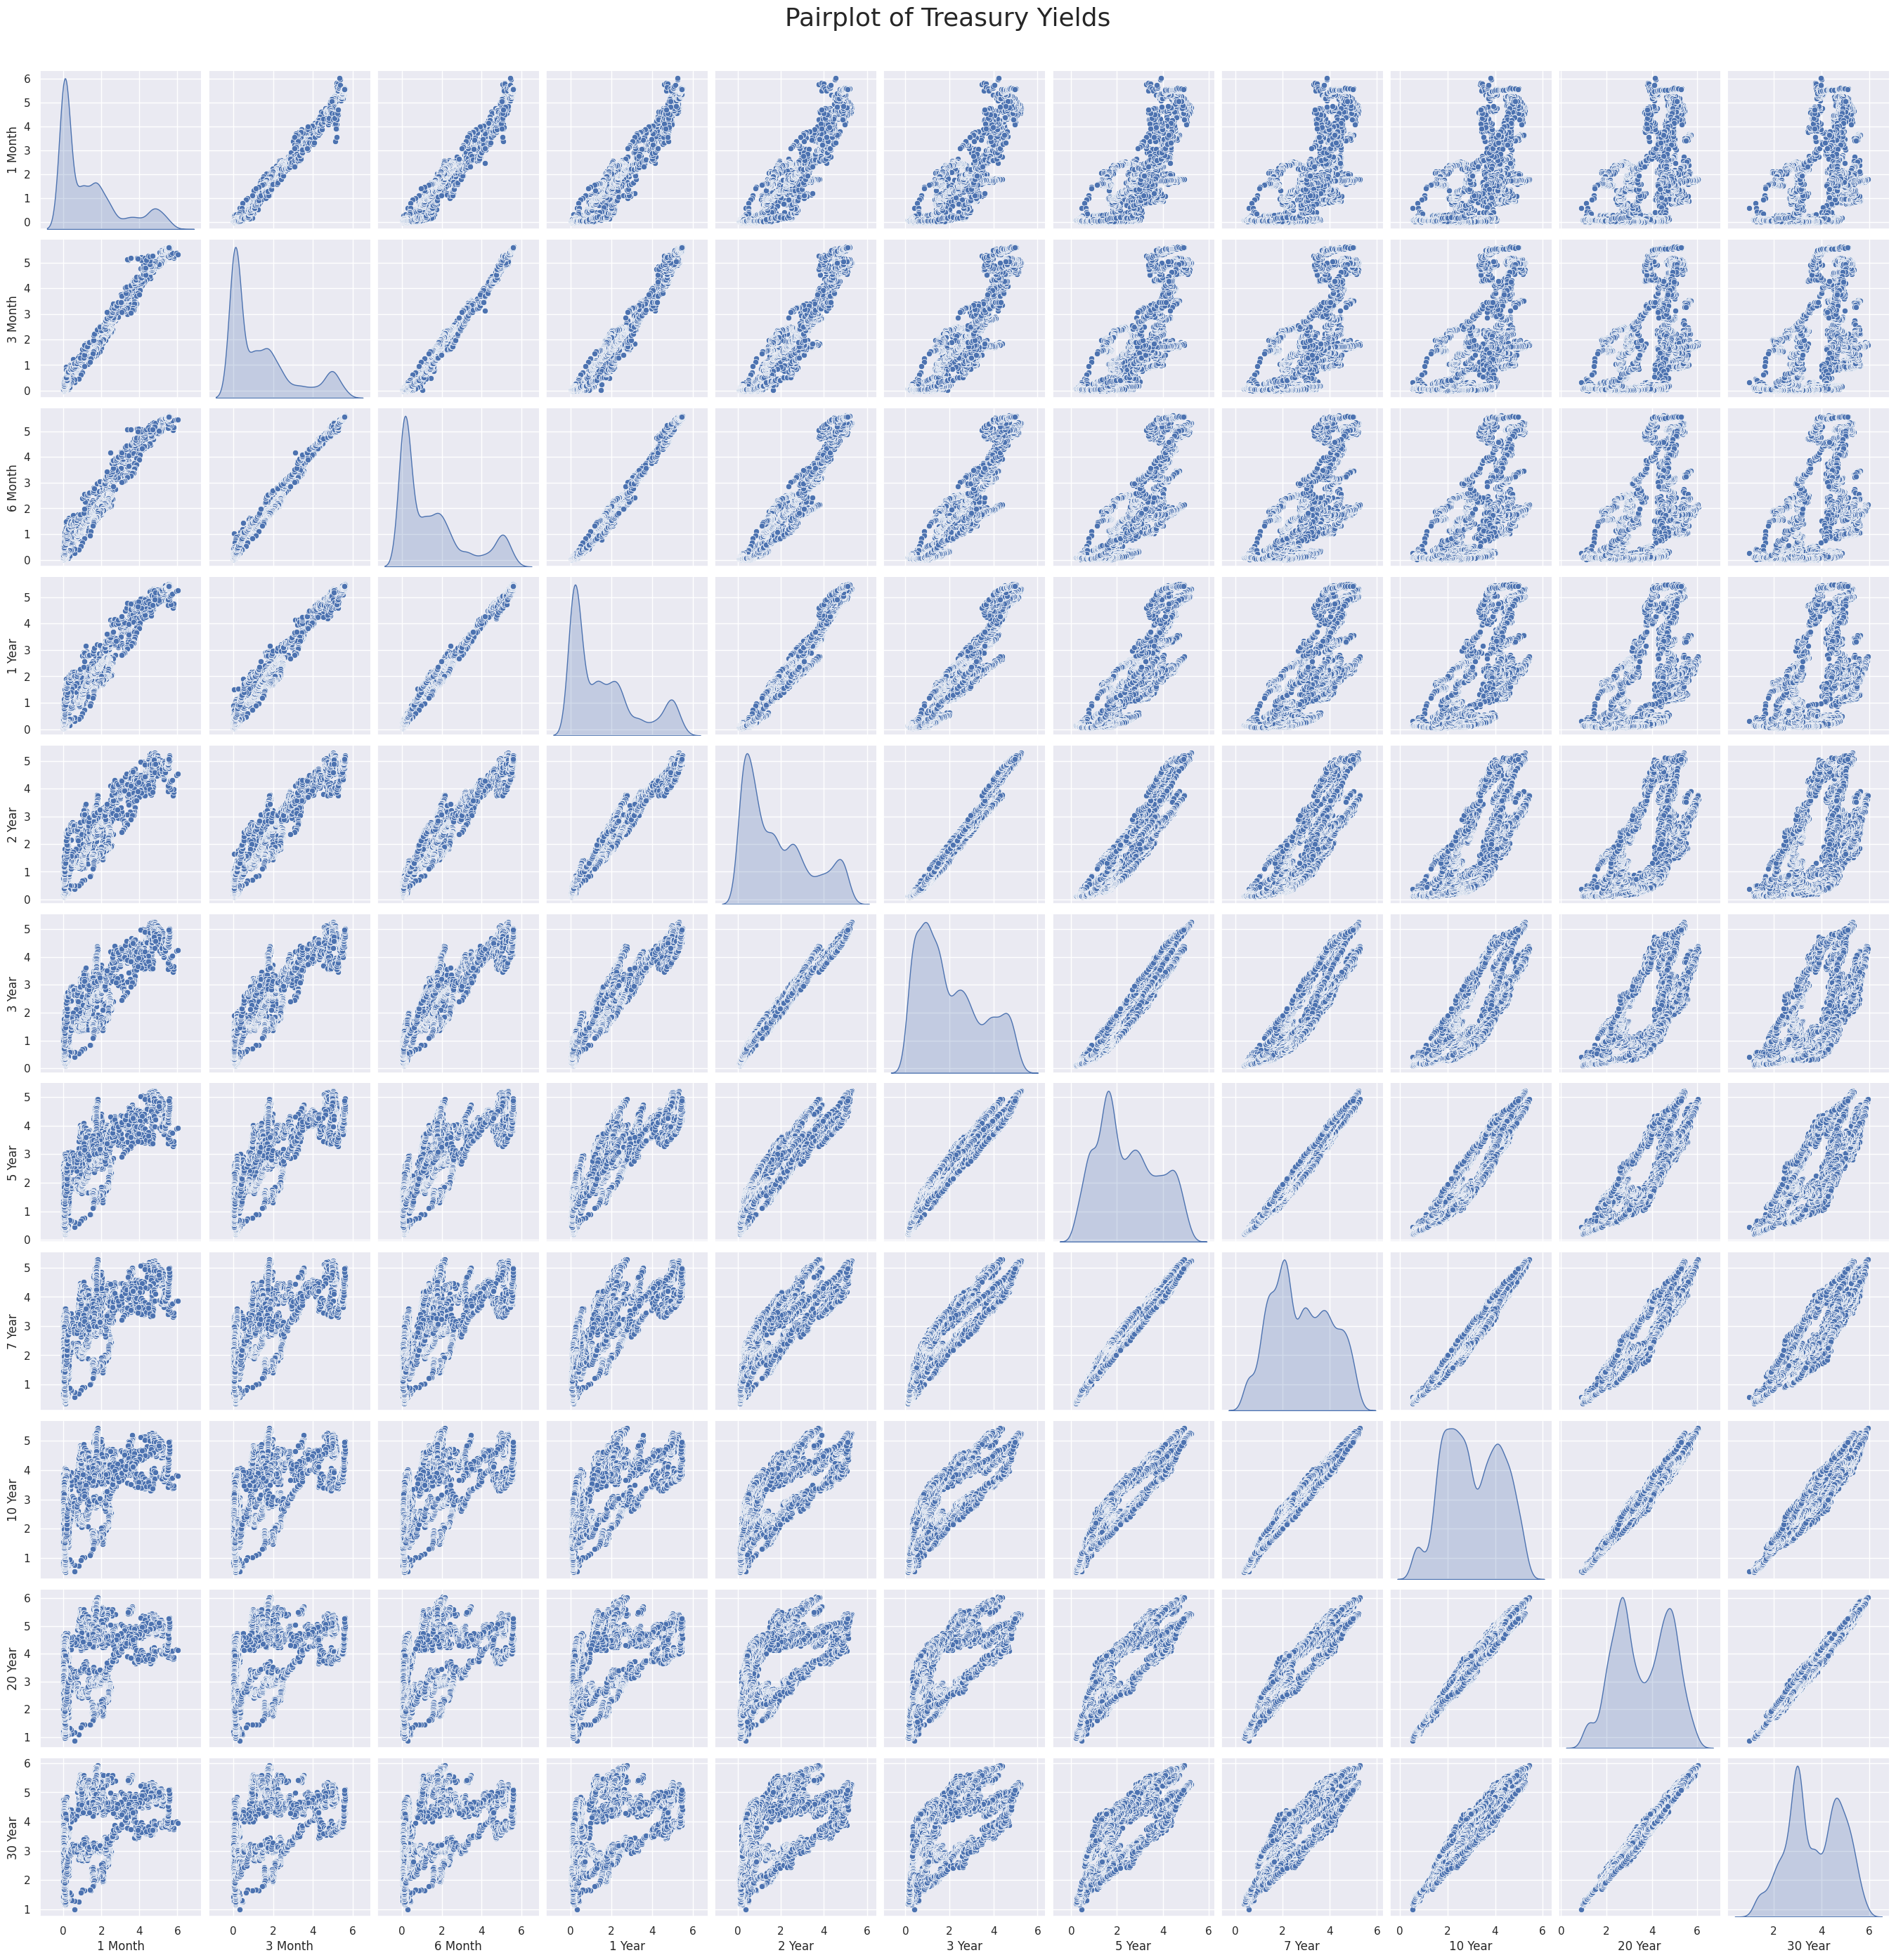

In [11]:
sns.pairplot(df.dropna(), diag_kind='kde')
plt.suptitle('Pairplot of Treasury Yields', y=1.02, fontsize=26)
plt.show()

<ipython-input-14-a6251e6cfa7c>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


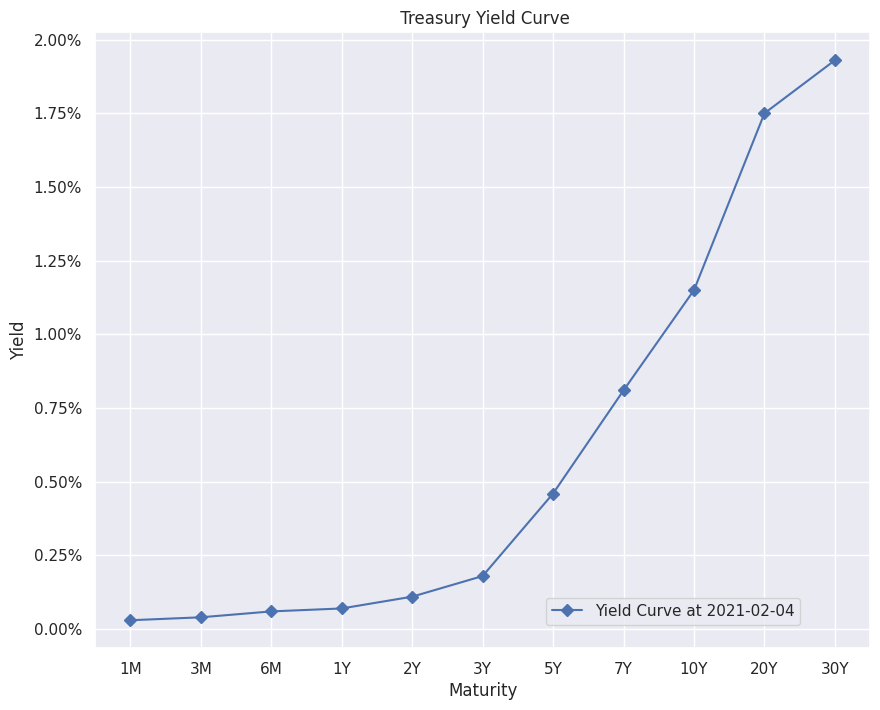

In [14]:
def plot_yield_curve(date):
  maturities = ['1M', '3M', '6M', '1Y', '2Y', '3Y', \
              '5Y', '7Y', '10Y', '20Y', '30Y']
  fig, ax = plt.subplots(figsize=(10, 8))
  ax.plot(maturities, df.loc[date], marker='D',label='Yield Curve at ' + date)

  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
  ax.set_xticks(range(len(maturities)))
  ax.set_xticklabels(maturities)

  ax.set_title(' Treasury Yield Curve')
  ax.set_xlabel('Maturity')
  ax.set_ylabel('Yield')

  fig.legend(loc = [0.62, 0.12])

  plt.grid(True)
  plt.show()
plot_yield_curve('2021-02-04')